In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import sklearn as sk

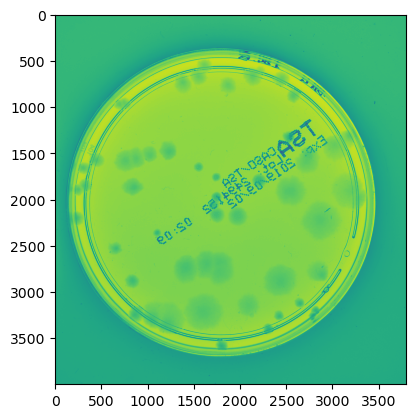

In [2]:
img = cv.imread("data/train_data/408.jpg", 0)
plt.imshow(img)

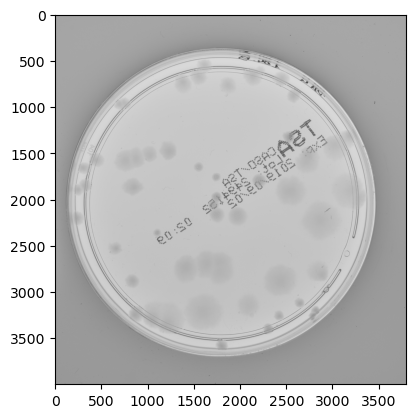

In [3]:
#blur the image
cimg = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
#blur = cv.GaussianBlur(cimg,(151,151),150)
plt.imshow(cimg)

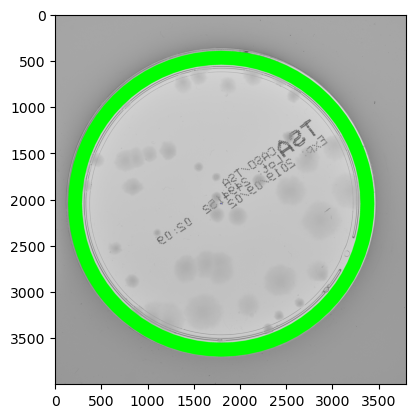

In [6]:
circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 
                          4, 10000, param1=200, param2=200, 
                          minRadius=1500, maxRadius=1800)

circles = np.uint16(np.around(circles)) #round the values to whole numbers and make them of type int

for c in circles[0, :]:
    cv.circle(cimg, (c[0], c[1]), c[2], (0, 255, 0), 150) #draw the outer circle
    cv.circle(cimg, (c[0], c[1]), 1, (0, 0, 255), 5) #draw circle center

plt.imshow(cimg)